<a href="https://colab.research.google.com/github/FinanceML/Quantile-Regression/blob/main/Quantile_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

## Creating the dataset & Setting some initial value 

In [ ]:
import math
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.regression.quantile_regression import QuantReg

np.random.seed(123456)
nSample = 1000
nFeature = 3
deleteFraction = 0.05
start_of_x = -1
end_of_x = 1
nDelete = round(nSample * deleteFraction)
quantileFraction = 0.8

In [ ]:
x = np.linspace(start_of_x, end_of_x, nSample)
X = np.column_stack((x, (3*x**2-1)/2, (5*x**3-3*x)/2))
beta = np.array([0.5, 4, 2.5, 1])

In [ ]:
# help(np.random.normal)

In [ ]:
e = np.random.normal(size=nSample, scale = 5)
e[:5]

array([ 2.3455615 , -1.41431672, -7.54529252, -5.67816186,  6.06056013])

In [ ]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [ ]:
print('X\'s shape is:', X.shape)
print('the first 5 samples in the dataset (features):')
X[:5, :]

X's shape is: (1000, 4)
the first 5 samples in the dataset (features):


array([[ 1.        , -1.        ,  1.        , -1.        ],
       [ 1.        , -0.997998  ,  0.99400001, -0.98801803],
       [ 1.        , -0.995996  ,  0.98801204, -0.97609606],
       [ 1.        , -0.99399399,  0.98203609, -0.96423396],
       [ 1.        , -0.99199199,  0.97607217, -0.95243163]])

In [ ]:
print('y\'s shape is:', y.shape)
print('the first 5 samples in the dataset (output):')
y[:5]


y's shape is: (1000,)
the first 5 samples in the dataset (output):


array([ 0.3455615 , -3.40932673, -9.53534247, -7.66328157,  4.08034095])

## performing a simple multivariate regression

In [ ]:
# help(sm.OLS)

In [ ]:
model = sm.OLS(y, X)
results = model.fit()
print('performing a simple multivariate regression:')
results.summary()

performing a simple multivariate regression:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     89.19
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           4.02e-51
Time:                        08:57:33   Log-Likelihood:                -3070.5
No. Observations:                1000   AIC:                             6149.
Df Residuals:                     996   BIC:                             6169.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2698      0.165      1.633      0.103      -0.054       0.594
x1             4.2287      0.286     14.789      0.000       3.668       4.790
x2             2.4988      0.369      6.776      0.000       1.775       3.222
x3             0.7151      0.436      1.641      0.101      -0.140       1.570
==============================================================================
Omnibus:                        2.806   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.246   Jarque-Bera (JB):                2.835
Skew:                          -0.129   Prob(JB):                        0.242
Kurtosis:                       2.957   Cond. No.                         2.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
results.params

array([0.26978002, 4.22871923, 2.49875465, 0.71512955])

In [ ]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)
print('Standard errors: ', results.bse)

print('first 5 "Predicted values": ', results.predict()[:5,])

Parameters:  [0.26978002 4.22871923 2.49875465 0.71512955]
R2:  0.21175050454977862
Standard errors:  [0.16524529 0.28592944 0.36876106 0.43588961]
first 5 "Predicted values":  [-2.1753141  -2.17327205 -2.17124286 -2.16922645 -2.16722272]


In [ ]:
sample_error = results.predict() - y
sorted_sample_error = np.sort(sample_error)
arg_sort = np.argsort(sample_error)

print('error of the first 5 samples with lowest error:', sorted_sample_error[:5])
print('error of the first 5 samples with highest error:', sorted_sample_error[:-5:-1])

error of the first 5 samples with lowest error: [-17.1865112  -14.16263205 -13.13282944 -12.74769516 -12.50807176]
error of the first 5 samples with highest error: [17.31044634 15.72282084 15.54082604 15.25738937]


## Creating the new dataset (the cropped dataset)

In [ ]:
newX = X[arg_sort[nDelete:len(arg_sort)-nDelete], :]
newy = y[arg_sort[nDelete:len(arg_sort)-nDelete],  ]

## Creating deleted sub-datasets

In [ ]:
deleted_X_high = X[arg_sort[len(arg_sort)-nDelete:], :]
deleted_y_high = y[arg_sort[len(arg_sort)-nDelete:],  ]

deleted_X_low = X[arg_sort[:nDelete], :]
deleted_y_low = y[arg_sort[:nDelete],  ]

In [ ]:
print('deleted_X_high.shape', deleted_X_high.shape, 'deleted_y_high.shape', deleted_y_high.shape)
print('\nfirst 5 samples of "deleted_X_high" sub-dataset:\n', deleted_X_high[:5, :])
print('\nfirst 5 samples of "deleted_y_high" sub-dataset:\n', deleted_y_high[:5, ])

deleted_X_high.shape (50, 4) deleted_y_high.shape (50,)

first 5 samples of "deleted_X_high" sub-dataset:
 [[ 1.          0.78378378  0.42147553  0.02805362]
 [ 1.          0.14714715 -0.46752158 -0.21275554]
 [ 1.         -0.54554555 -0.05357009  0.41240523]
 [ 1.          0.42942943 -0.22338555 -0.44616683]
 [ 1.          0.07107107 -0.49242335 -0.10570914]]

first 5 samples of "deleted_y_high" sub-dataset:
 [ -4.22466219  -9.43667063 -11.07555234  -8.09313063 -10.09221742]


## Performing Multi-variate Quantile Regression

In [ ]:
# help(QuantReg)

In [ ]:
QR_object = QuantReg(newy, newX)
QR_result_object = QR_object.fit(q=quantileFraction)
QR_result_object

import inspect
print('QR_object:\n', inspect.getmro(type(QR_object)))
print('QR_result_object\n', inspect.getmro(type(QR_result_object)))

QR_object:
 (<class 'statsmodels.regression.quantile_regression.QuantReg'>, <class 'statsmodels.regression.linear_model.RegressionModel'>, <class 'statsmodels.base.model.LikelihoodModel'>, <class 'statsmodels.base.model.Model'>, <class 'object'>)
QR_result_object
 (<class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>, <class 'statsmodels.base.wrapper.ResultsWrapper'>, <class 'object'>)


In [ ]:
QR_result_object.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                      y   Pseudo R-squared:               0.1805
Model:                       QuantReg   Bandwidth:                       2.044
Method:                 Least Squares   Sparsity:                        14.21
Date:                Thu, 24 Oct 2019   No. Observations:                  900
Time:                        09:00:38   Df Residuals:                      896
                                        Df Model:                            3
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1029      0.190     21.568      0.000       3.730       4.476
x1             4.2792      0.330     12.964      0.000       3.631       4.927
x2             2.5612      0.407      6.296      0.000       1.763       3.360
x3             0.6322      0.492      1.286      0.199      -0.333       1.597
==============================================================================
"""

In [ ]:
print('The model degree of freedom:', QR_object.df_model)
print('The residual degree of freedom:', QR_object.df_resid)
print('Names of endogenous variables:', QR_object.endog_names)
print('Names of exogenous  variables:', QR_object.exog_names)

The model degree of freedom: 3.0
The residual degree of freedom: 896.0
Names of endogenous variables: y
Names of exogenous  variables: ['const', 'x1', 'x2', 'x3']


## Plotting output (y) with respect to each feature

In [ ]:
newy_pred = QR_result_object.predict()
label_ols = 'OLS (simple regression)'
label_lad = 'LAD (quantile regression)'

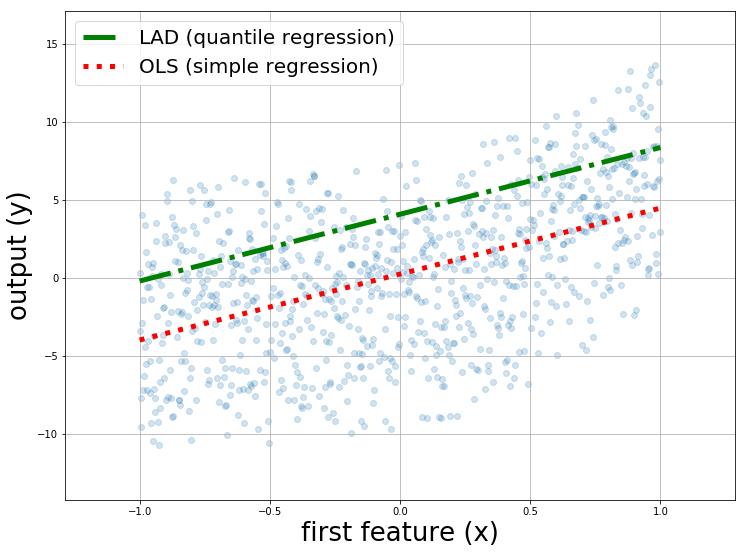

In [ ]:
feature_idx = 1
num_of_points = 100
plot_x = newX[:, feature_idx]
x_min = np.min(plot_x); x_max = np.max(plot_x)
y_min = np.min(newy); y_max = np.max(newy)
ols_coeff = results.params[[0, feature_idx]]
lad_coeff = QR_result_object.params[[0, feature_idx]]

fig, ax = plt.subplots(figsize=(8*3/2, 6*3/2))
ax.plot(np.linspace(x_min, x_max, num_of_points),
        lad_coeff[0] + lad_coeff[1] * np.linspace(x_min, x_max, num_of_points), 
        linestyle='-.', linewidth=5, color='green', label = label_lad)

ax.plot(np.linspace(x_min, x_max, num_of_points), 
        ols_coeff[0] + ols_coeff[1] * np.linspace(x_min, x_max, num_of_points),
        linestyle=':', linewidth=5, color='red', label=label_ols)

ax.scatter(plot_x, newy, alpha=.2)

ax.set_xlim((x_min - ((x_max-x_min)/7), x_max + ((x_max-x_min)/7)))
ax.set_ylim((y_min - ((y_max-y_min)/7), y_max + ((y_max-y_min)/7)))
legend = ax.legend(fontsize=20)
ax.set_xlabel('first feature (x)', fontsize=26)
ax.set_ylabel('output (y)', fontsize=26)
ax.grid(True)

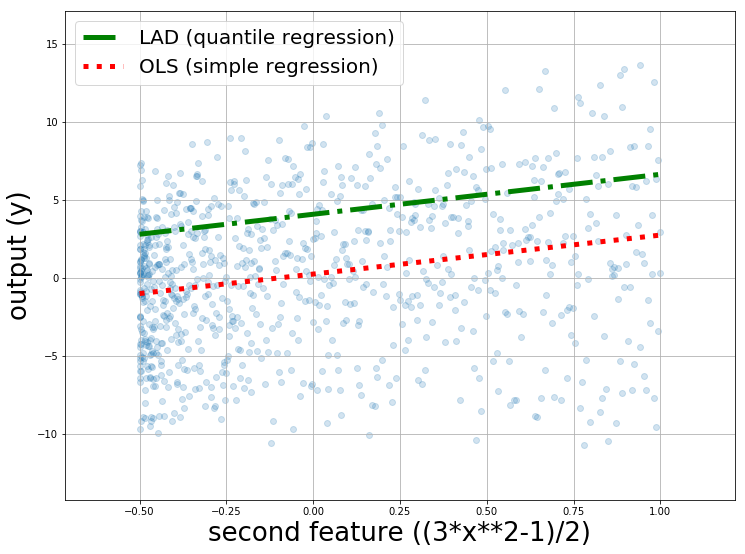

In [ ]:
feature_idx = 2
num_of_points = 100
plot_x = newX[:, feature_idx]
x_min = np.min(plot_x); x_max = np.max(plot_x)
y_min = np.min(newy); y_max = np.max(newy)
ols_coeff = results.params[[0, feature_idx]]
lad_coeff = QR_result_object.params[[0, feature_idx]]

fig, ax = plt.subplots(figsize=(8*3/2, 6*3/2))
ax.plot(np.linspace(x_min, x_max, num_of_points),
        lad_coeff[0] + lad_coeff[1] * np.linspace(x_min, x_max, num_of_points),
        linestyle='-.', linewidth=5, color='green', label = label_lad)

ax.plot(np.linspace(x_min, x_max, num_of_points), 
        ols_coeff[0] + ols_coeff[1] * np.linspace(x_min, x_max, num_of_points),
        linestyle=':', linewidth=5, color='red', label=label_ols)

ax.scatter(plot_x, newy, alpha=.2)

ax.set_xlim((x_min - ((x_max-x_min)/7), x_max + ((x_max-x_min)/7)))
ax.set_ylim((y_min - ((y_max-y_min)/7), y_max + ((y_max-y_min)/7)))
legend = ax.legend(fontsize=20)
ax.set_xlabel('second feature ((3*x**2-1)/2)', fontsize=26)
ax.set_ylabel('output (y)', fontsize=26)
ax.grid(True)

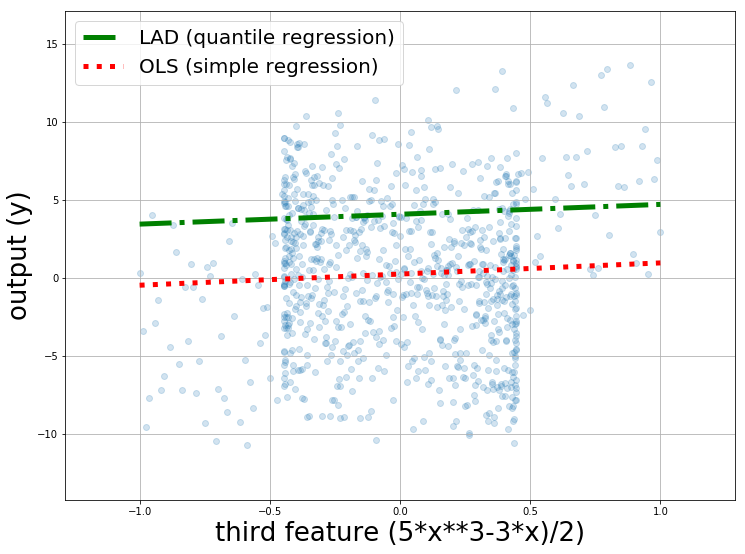

In [ ]:
feature_idx = 3
num_of_points = 100
plot_x = newX[:, feature_idx]
x_min = np.min(plot_x); x_max = np.max(plot_x)
y_min = np.min(newy); y_max = np.max(newy)
ols_coeff = results.params[[0, feature_idx]]
lad_coeff = QR_result_object.params[[0, feature_idx]]

fig, ax = plt.subplots(figsize=(8*3/2, 6*3/2))
ax.plot(np.linspace(x_min, x_max, num_of_points),
        lad_coeff[0] + lad_coeff[1] * np.linspace(x_min, x_max, num_of_points),
        linestyle='-.', linewidth=5, color='green', label = label_lad)

ax.plot(np.linspace(x_min, x_max, num_of_points), 
        ols_coeff[0] + ols_coeff[1] * np.linspace(x_min, x_max, num_of_points),
        linestyle=':', linewidth=5, color='red', label=label_ols)

ax.scatter(plot_x, newy, alpha=.2)

ax.set_xlim((x_min - ((x_max-x_min)/7), x_max + ((x_max-x_min)/7)))
ax.set_ylim((y_min - ((y_max-y_min)/7), y_max + ((y_max-y_min)/7)))
legend = ax.legend(fontsize=20)
ax.set_xlabel('third feature (5*x**3-3*x)/2)', fontsize=26)
ax.set_ylabel('output (y)', fontsize=26)
ax.grid(True)